# K-Nearest Neighbors (Euclidean distance)

Im folgendem wird ein Machine Learning Klassifizierungsproblem mithilfe des `K-Nearest-Neighbors` gelöst. <br />
Als distanzbestimmungsformel wird die `euclidean distance` genutzt.

Als Datenset wird das Iris Datenset genutzt. Wichtig hierbei, ist die analogie der Pflanze:

![test](https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg)


Dataset based on https://gist.github.com/nafiul-nipu/c46c3297aec7843016359a98467b17d3

In [ ]:
# Dependency installieren
!{sys.executable} -m pip install pandas

import pandas as pd
import numpy

In [321]:
# CSV Datei einlesen und auf ein 2D Array mappen
iris_dataset_file = pd.read_csv("iris_dataset.csv", sep=",", header=None)
iris_dataset = iris_dataset_file.values

feature_names = iris_dataset[0]
iris_dataset = iris_dataset[1:]

# Ersten 5 Reihen ausgeben um Werte anzusehen
print(iris_dataset_file.head(5))

              0            1             2            3        4
0  sepal_length  sepal_width  petal_length  petal_width  species
1           5.1          3.5           1.4          0.2   setosa
2           4.9          3.0           1.4          0.2   setosa
3           4.7          3.2           1.3          0.2   setosa
4           4.6          3.1           1.5          0.2   setosa


In [322]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# In Machine Learning Context steht groß X für die tatsächlichen Daten und
# y für die Zuordnung.

# Wir nutzen hier "StandardScaler().fit_transform" um die Daten zu normalisieren (Nur Werte zwischen 0 und 1)
X = StandardScaler().fit_transform(iris_dataset[:, 0:4])
y = iris_dataset[:, 4]

# Datenset in trainings- und testdaten trennen. Test size 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [323]:
# Testen ob in X wirklich nur Werte und keine Klassifizierungen mehr stehen
print(X_test[0:5])

[[-0.90068117  1.72626612 -1.227541   -1.31297673]
 [ 0.67450115 -0.35636057  0.30783301  0.13322594]
 [-0.53717756  1.95766909 -1.17067529 -1.05003079]
 [ 0.67450115 -0.58776353  1.04708716  1.31648267]
 [-0.90068117  1.03205722 -1.3412724  -1.18150376]]


In [301]:
# print first dataset of the iris dataset
example_data = X_train[0]

print(f"Classification: \"{y_train[0]}\"")
print("--------------")

for index, data_point in enumerate(example_data):
    print(feature_names[index] + f":  {data_point}")

Classification: "virginica"
--------------
sepal_length:  2.2496834612371255
sepal_width:  -0.12495760117130933
petal_length:  1.331415682735028
petal_width:  1.4479556431467018


In [302]:
import matplotlib.pyplot as plt

COLORS = {
    "setosa": "r",
    "virginica": "g",
    "versicolor": "b"
}

def show_graph(feature_one: int, feature_two: int, X_dataset: numpy.ndarray, y_labels: numpy.ndarray):
    fig, ax = plt.subplots()

    for index, data in enumerate(X_dataset):
        classification = y_labels[index]
        ax.scatter(data[feature_one], data[feature_two], color=COLORS[classification])

    # set a title and labels
    ax.set_xlabel(feature_names[feature_one])
    ax.set_ylabel(feature_names[feature_two])

    plt.show()

## Trainingsdaten Validierung

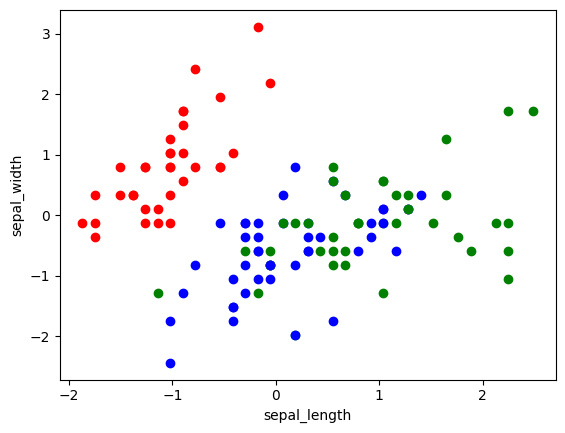

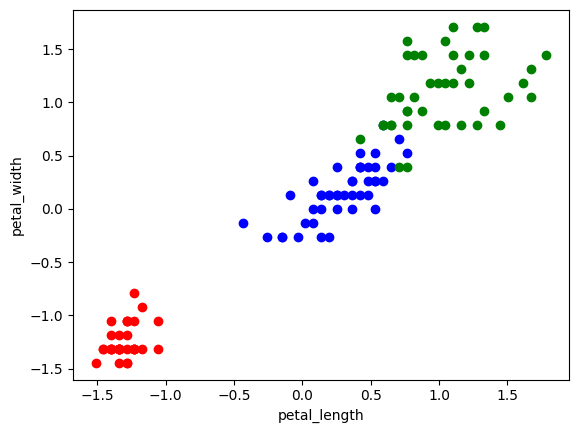

In [405]:
show_graph(0, 1, X_train, y_train)
show_graph(2, 3, X_train, y_train)

## Testdaten Visualisierung


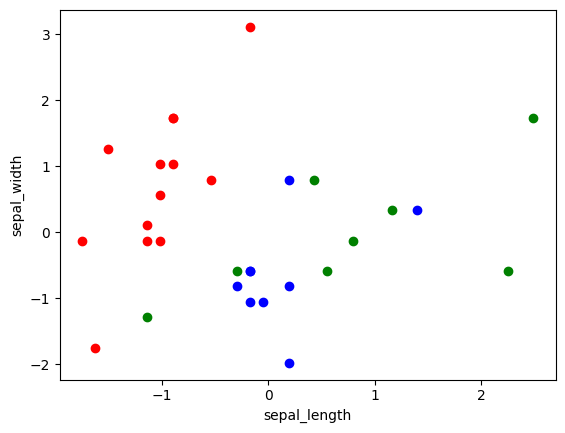

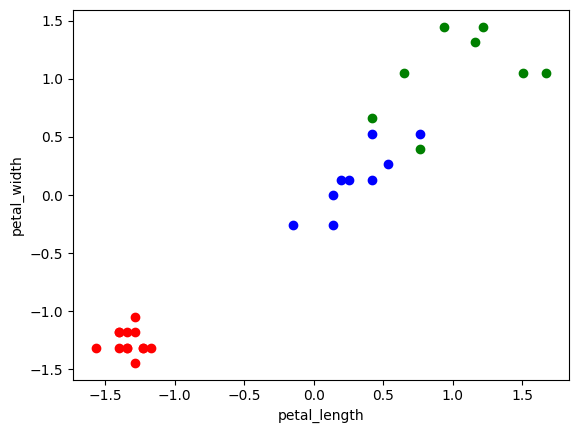

In [304]:
show_graph(0, 1, X_test, y_test)
show_graph(2, 3, X_test, y_test)

## Vorhersage und Algorithmusimplementation

Beim ausgeben der Daten ist also ein klarer Zusammenhang zwischen den Features (sepal/petal width & length) ersichtlich.

Klare Klassifizierung der Daten möglich!

Um nun einen neuen Datenpunk einer bestimmten Klasse zuzuordnen, betrachten wir die anliegenden Nachbaren.

<img src="https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/ef/3a/KNN.component.l-retina.ts=1639762044031.png/content/adobe-cms/us/en/topics/knn/jcr:content/root/table_of_contents/intro/complex_narrative/items/content_group/image" width="700" />


Zur berechnung der Distanz zwischen diesen Datenpunkten wird die `euclidean distance` Formel genutzt, die wie folgt lautet:

$$d\left( p,q\right)   = \sqrt {\sum _{i=1}^{n}  \left( q_{i}-p_{i}\right)^2 } $$

Wobei in diesem Datenset n = 4 gilt. Also hat jeder Datenpunkt 4 Dimensionen:

$$p = P({x}_{1}, {x}_{2}, {x}_{3}, {x}_{4})$$
$$q = P({x}_{1}, {x}_{2}, {x}_{3}, {x}_{4})$$

In [324]:
import math

def euclidean_distance(p: numpy.ndarray, q: numpy.ndarray) -> float:
    distance = 0

    for dimension in range(q.size - 1):
        distance += (q[dimension] - p[dimension])**2

    return math.sqrt(distance)

In [360]:
class KNearestNeighborsClassifier():
    def __init__(self, k: int, X_train, y_train):
        self.k = k
        self.X_train = X_train
        self.y_train = y_train

    def set_k(self, k: int):
        self.k = k

    def predict(self, X_sample: numpy.ndarray) -> str:
        distances = []
        for index, training_row in enumerate(self.X_train):
            calculated_distance = euclidean_distance(X_sample, training_row)
            distances.append((self.y_train[index], calculated_distance))

        distances.sort(key=lambda element: element[1])
        neighbors = []

        for index in range(self.k):
            neighbors.append(distances[index][0])

        prediction = max(set(neighbors), key=neighbors.count)

        return prediction

    def evaluate(self, X_test: numpy.ndarray, y_test: numpy.ndarray) -> float:
        accurate_count = 0

        for index, X_sample in enumerate(X_test):
            prediction = self.predict(X_sample)

            if prediction is y_test[index]:
                accurate_count += 1

        accuracy = (accurate_count / float(len(X_test)))

        return accuracy

In [361]:
knn = KNearestNeighborsClassifier(5, X_train, y_train)

In [400]:
print(f"Overall accuracy: {knn.evaluate(X_test, y_test):.2%}")

Overall accuracy: 96.67%


Best k: 22


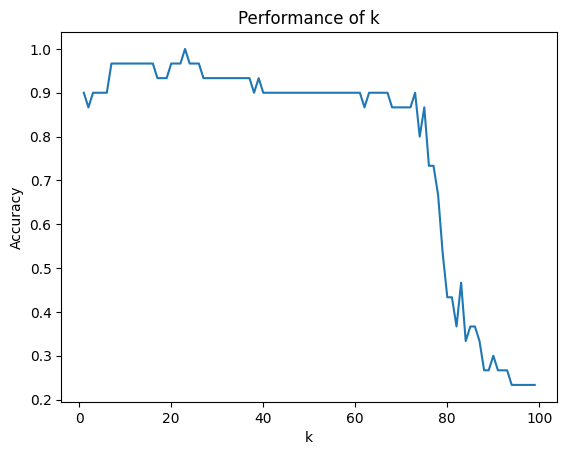

In [481]:
def find_best_k(k_values: range):
    accuracies = []
    for k in k_values:
        knn.set_k(k)
        accuracy = knn.evaluate(X_test, y_test)
        accuracies.append(accuracy)

    return accuracies


k_values = range(1, 100)
accuracies = find_best_k(k_values)
best_k = accuracies.index(max(accuracies))
print(f"Best k: {best_k}")

fig, ax = plt.subplots()
ax.plot(k_values, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of k")
plt.show()

In [484]:
import random


random_index = random.randint(0, len(X_test) - 1)

X_sample = X_test[random_index]
knn.set_k(1)

prediction = knn.predict(X_sample)

print(f"Unclassified data: {X_sample}")
print(f"Prediction: {prediction}")
print(f"Actual: {y_test[random_index]}")

Unclassified data: [-0.53717756  1.49486315 -1.2844067  -1.31297673]
Prediction: setosa
Actual: setosa
